# By AMERICAN CHAUHAN

# The Sparks Foundation - Data Science & Business Analytics Internship

## Task 3: Perform  'Exploratory Data Analysis' on 'SampleSuperStore'

### Aim: To find out weak areas where we can work to make more profit.

In [1]:
# importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import warnings as wg
wg.filterwarnings("ignore")

## Load the dataset

In [2]:
df = pd.read_csv("SampleSuperstore.csv")

In [3]:
df.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


## Data Preprocessing

In [4]:
#checking the shape of dataset
df.shape

(9994, 13)

In [5]:
#printing the columns
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [6]:
#checking null values
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
#info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
#describing the dataset
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [9]:
# checking whether there is any duplicate value or not
df.duplicated().sum()

17

#there are 17 duplicate values
which we will drop

In [10]:
#dropping the duplicates
df.drop_duplicates()


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


#removing the unnecessory columns
Here unnecessory column is postal code

In [11]:
df = df.drop(['Postal Code'], axis = 1)

In [12]:
df.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Exploaratory Data Analysis

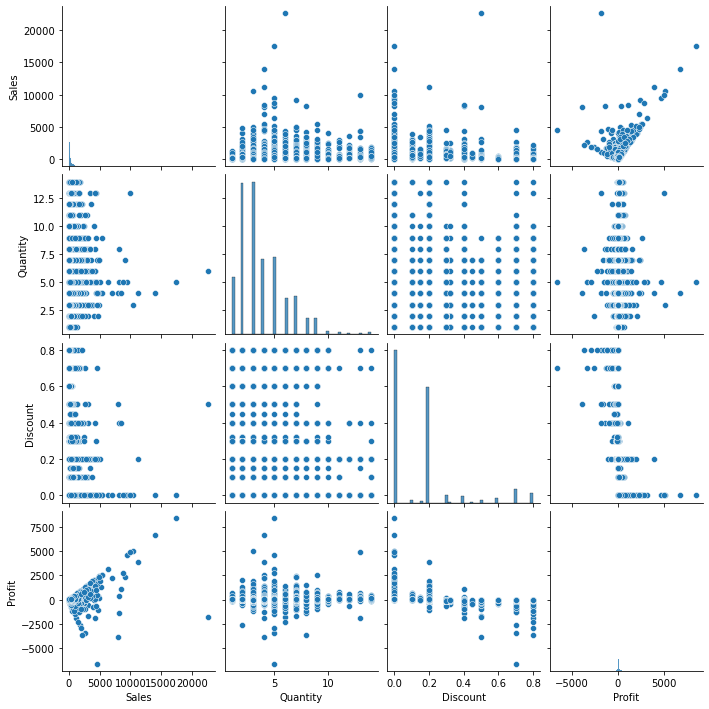

In [13]:
#Displaying pairplot using seaborn
sns.pairplot(df)

<Figure size 720x360 with 0 Axes>

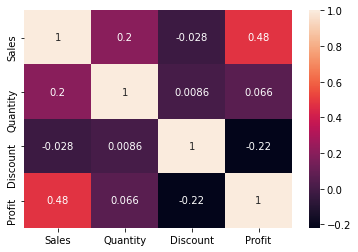

<Figure size 720x360 with 0 Axes>

In [14]:
#using heatmap to check correlation
sns.heatmap(df.corr(), annot = True)
plt.figure(figsize=(10, 5))

Visualisation of Sales by Category

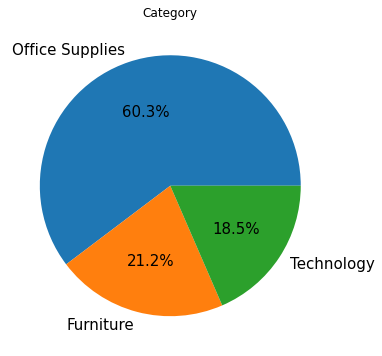

In [15]:
#Plotting a pie chart to differentiate the sales by Category
plt.figure(figsize = (6,6))
plt.title('Category')
plt.pie(df['Category'].value_counts(), labels=df['Category'].value_counts().index,autopct='%1.1f%%',textprops = {"fontsize":15})
plt.show()

Visualising Sales vs Profit

<Figure size 720x1152 with 0 Axes>

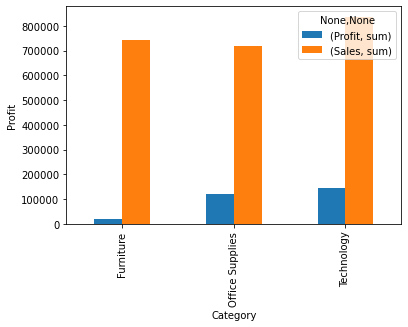

In [16]:
#Visualising the Profits and Sales

plt.figure(figsize= (10,16))
df.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.ylabel('Profit')
plt.show()

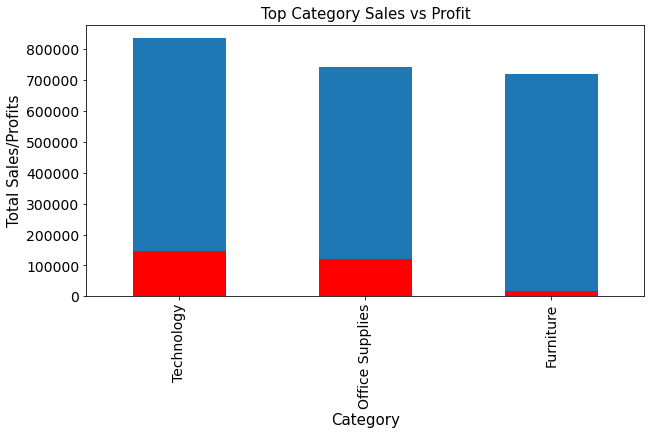

In [17]:
top_category_s = df.groupby("Category").Sales.sum().nlargest(n=100)
top_category_p = df.groupby("Category").Profit.sum().nlargest(n=100)

top_category_s.plot(kind = 'bar',figsize = (10,5),fontsize = 14)
top_category_p.plot(kind = 'bar',figsize = (10,5),fontsize = 14,color='red')
plt.xlabel('Category',fontsize = 15)
plt.ylabel('Total Sales/Profits',fontsize = 15)
plt.title("Top Category Sales vs Profit",fontsize = 15)
plt.show()

#### Sub-category Visualization

Visualising by the sub-categories of sales items

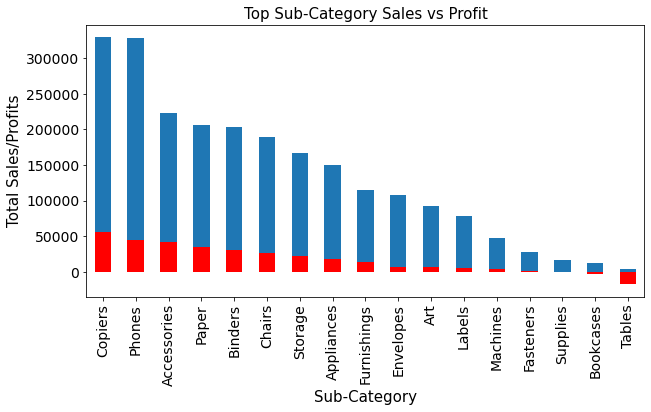

In [18]:
top_subcategory_s = df.groupby("Sub-Category").Sales.sum().nlargest(n = 100)
top_subcategory_p = df.groupby("Sub-Category").Profit.sum().nlargest(n = 100)

top_subcategory_s.plot(kind = 'bar',figsize = (10,5),fontsize = 14)
top_subcategory_p.plot(kind = 'bar',figsize = (10,5),fontsize = 14, color = 'red')
plt.xlabel('Sub-Category',fontsize = 15)
plt.ylabel('Total Sales/Profits',fontsize = 15)
plt.title("Top Sub-Category Sales vs Profit",fontsize = 15)
plt.show()

#### Sales and Profits in different regions

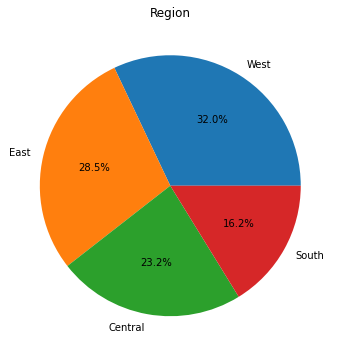

In [19]:
plt.figure(figsize = (6,6))
plt.title('Region')
plt.pie(df['Region'].value_counts(), labels=df['Region'].value_counts().index,autopct='%1.1f%%')
plt.show()

The above graph shows that West and East have same Profit though sales in the East are less as compared to West.

#### Sales and profits by states

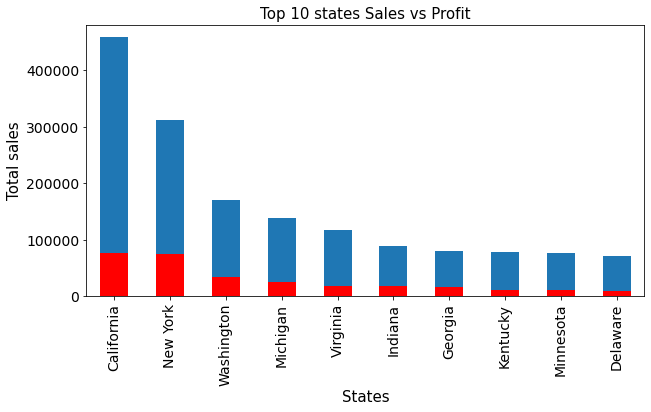

In [20]:
top_states_s = df.groupby("State").Sales.sum().nlargest(n=10)
top_states_p = df.groupby("State").Profit.sum().nlargest(n = 10)

top_states_s.plot(kind = 'bar',figsize = (10,5),fontsize = 14)
top_states_p.plot(kind = 'bar',figsize = (10,5),fontsize = 14, color = 'red')
plt.xlabel('States',fontsize = 15)
plt.ylabel('Total sales',fontsize = 15)
plt.title("Top 10 states Sales vs Profit",fontsize = 15)
plt.show()

In [21]:
#From above graph, we can see California and New York having more sales and profits as compared to other states

#### Next is to check the interdependencies between columns

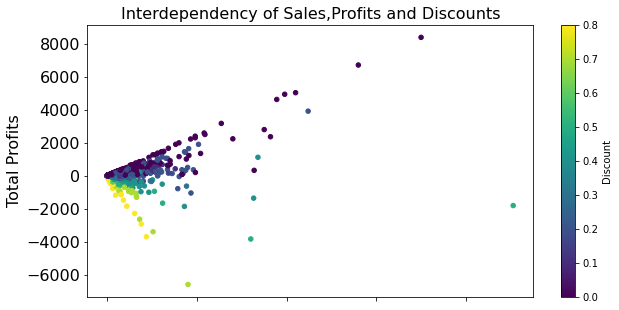

In [22]:
df.plot(kind = "scatter",figsize = (10,5), x = "Sales", y= "Profit", c = "Discount", s = 20,fontsize = 16, colormap = "viridis")
plt.ylabel('Total Profits',fontsize = 16)
plt.title("Interdependency of Sales,Profits and Discounts",fontsize = 16)

plt.show()

From above graph, we can see that if we give more discount it will increase the sales but will lead to decrease in profit.

## Conclusion :

To make more profit these points must be focused:

1. Minimising the sub-categories sales table
2. Limiting the sales of furniture as these are less profitable if we consider it with sales of other items.
3. Increase sales more in the east profit is more in the east area.
4. Concentrate on California and New York, these states are major area for profiting the business.